## Observations and analysis
**For 2 Aug 2021:**
- There is a positive correlation between max temperature and latitude in the Southern Hemisphere and a negative correlation in the Northern Hemisphere. Conclusion: The closer a city is to the Equator, the more likely it will have a higher max temperature than cities further away from the Equator.
- There is a very slight positive correleation between humidity and city latitde in the Southern Hemisphere and a slightly steeper negative correlelation between humidity and city latitude. Conclusion: In the Southern Hemisphere, humidity is marginally affected by latitude; however in the Northern Hemisphere, cities closer to the Equator likely will have a slightly higher humidity percentage than cities further from the Equator.
- There is a positive correlation between cloudiness and latitude in the Southern Hemisphere and a slight negative correlation in the Northern Hemisphere. Conclusion: In the Southern Hemispher, the closer a city is to the Equator, the more likely it will be cloudier than cities further away from the Equator; however in the Northern Hemisphere there will be little difference in cloudiness regardless of proximity to the Equator.
- There is a negative correleation between wind speed and city latitde in the Southern Hemisphere and an even shallower negative correlelation between wind speed and city latitude in the Northern Hemisphere. Conclusion: In the both Hemispheres, wind speed is slightly affected by latitude, with Southern Hemisphere winds speeds decreasing slightly as city latitudes approach the equator and Northern Hemisphere winds speeds increasing slightly as city latitudes approach the Equator.

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st
import os
from citipy import citipy

In [274]:
# Create folder "output_data" to store output files
os.mkdir("output_data")

In [2]:
# Import API key
from config import weather_api_key

In [18]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Lists for holding lat_lngs and cities
lat_lngs = []
locations = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=3500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=3500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_citypy = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country_citypy = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    city_country = (city_citypy, country_citypy)


    # If the city is unique, add it to cities list
    if city_country not in locations:
        locations.append(city_country)

# Print the city count to confirm sufficient count
len(locations)

1122

In [23]:
locations[-1]

('alghero', 'it')

In [109]:
# Iterative call to API to get and store weather data in a dictionary
base_url = "https://api.openweathermap.org/data/2.5/weather"
units = "imperial"
weather_stats = []

for query_city, query_country in locations:
    params = {"q" : f"{query_city},{query_country}",
              "appid" : weather_api_key,
              "units" : units}

    results_json = requests.get(url=base_url, params=params).json()

    try:
        lat = results_json["coord"]["lat"]
    except:
        lat = "-"
    try:
        lon = results_json["coord"]["lon"]
    except:
        lon = "-"
    try:
        temp_max_f = results_json["main"]["temp_max"]
    except:
        temp_max_f = "-"
    try:
        humidity = results_json["main"]["humidity"]
    except:
        humidity = "-"
    try:
        cloudiness = results_json["clouds"]["all"]
    except:
        cloudiness = "-"
    try:
        wind_speed = results_json["wind"]["speed"]
    except:
        wind_speed = "-"
    try:
        city_id = results_json["id"]
    except:
        city_id = "-"
    try:
        city = results_json["name"]
    except:
        city = "-"
    try:
        country = results_json["sys"]["country"]
    except:
        country = "-"
    try:
        date = results_json["dt"]
    except:
        date = "-"

    weather = {"city" : city, "country" : country, "lat" : lat, "lon" : lon, "max_temp (F)" : temp_max_f, "humidity (%)" : humidity , "cloudiness (%)" : cloudiness, "wind_speed (mph)" : wind_speed , "date" : date}
    weather_stats.append(weather)

    print(f"City ID: {city_id} | City: {city} | Country: {country}")
    
    sleep_time = round(np.random.uniform(low=0, high=10), 3)
    time.sleep(sleep_time)

City ID: 4035715 | City: Avarua | Country: CK
City ID: 3831208 | City: Qaanaaq | Country: GL
City ID: 4030556 | City: Rikitea | Country: PF
City ID: 3412093 | City: Vestmannaeyjar | Country: IS
City ID: 2126710 | City: Beringovskiy | Country: RU
City ID: 2028164 | City: Deputatsky | Country: RU
City ID: - | City: - | Country: -
City ID: 4032243 | City: Vaini | Country: TO
City ID: 3877348 | City: Panguipulli | Country: CL
City ID: 3440777 | City: Rocha | Country: UY
City ID: - | City: - | Country: -
City ID: 2137773 | City: Vao | Country: NC
City ID: 2075265 | City: Busselton | Country: AU
City ID: 546105 | City: Nikolskoye | Country: RU
City ID: - | City: - | Country: -
City ID: 3985710 | City: Cabo San Lucas | Country: MX
City ID: 2411397 | City: Georgetown | Country: SH
City ID: 5557293 | City: Sitka | Country: US
City ID: 2013375 | City: Vitim | Country: RU
City ID: 5887916 | City: Athabasca | Country: CA
City ID: 2063036 | City: Port Lincoln | Country: AU
City ID: - | City: - | Co

In [110]:
# Create the dataframe
city_weather_raw_df = pd.DataFrame(weather_stats)
city_weather_clean_df = city_weather_raw_df.loc[city_weather_raw_df["city"] != "-"]
city_weather_clean_df

,city,country,lat,lon,max_temp (F),humidity (%),cloudiness (%),wind_speed (mph),date
0,Avarua,CK,-21.2078,-159.775,78.85,78,75,10.36,1627954450
1,Qaanaaq,GL,77.484,-69.3632,43.48,70,78,2.66,1627954454
2,Rikitea,PF,-23.1203,-134.9692,69.6,57,44,21,1627954463
3,Vestmannaeyjar,IS,63.4427,-20.2734,52.43,83,100,5.3,1627954399
4,Beringovskiy,RU,63.05,179.3167,44.19,94,100,8.66,1627954426
...,...,...,...,...,...,...,...,...,...
1117,Bealanana,MG,-14.55,48.7333,56.25,87,6,2.24,1627961523
1118,Mae Hong Son,TH,19.3003,97.9685,80.74,78,75,2.3,1627961530
1119,North Bay,CA,46.3168,-79.4663,64.38,72,1,3,1627961535
1120,Nizwá,OM,22.9333,57.5333,90.32,37,34,4.09,1627961544


In [111]:
# Check if any cities have humidity over 100%
city_weather_clean_df.loc[city_weather_clean_df["humidity (%)"] > 100]

,city,country,lat,lon,max_temp (F),humidity (%),cloudiness (%),wind_speed (mph),date


There are no cities with humidity greater than 100%

In [113]:
city_weather_df = city_weather_clean_df
city_weather_df.to_csv("output_data/cities.csv")

In [114]:
# Find date in last row of data frame and assign it to a variable
utc_date_int = city_weather_df["date"].tail(1).item()
date = datetime.fromtimestamp(utc_date_int).strftime("%d %b %Y")

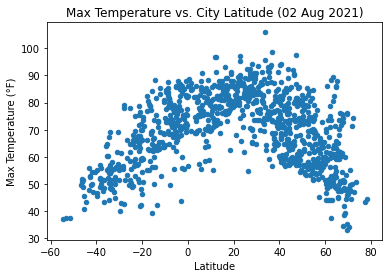

In [115]:
# Plot Max Temp vs City Latitude
max_temp_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                            x="lat", 
                                            y="max_temp (F)", 
                                            title=f"Max Temperature vs. City Latitude ({date})", 
                                            xlabel="Latitude", 
                                            ylabel="Max Temperature (°F)").figure 
plt.show()
max_temp_vs_lat_plot.savefig("output_data/max_temp_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing max temperature of cities around the world and their latitude.**

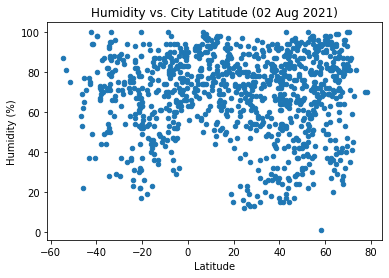

In [116]:
# Plot Humidity vs City Latitude
humidity_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                            x="lat", 
                                            y="humidity (%)", 
                                            title=f"Humidity vs. City Latitude ({date})", 
                                            xlabel="Latitude", 
                                            ylabel="Humidity (%)").figure
plt.show()
humidity_vs_lat_plot.savefig("output_data/humidity_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing humidity percentage of cities around the world and their latitude.**

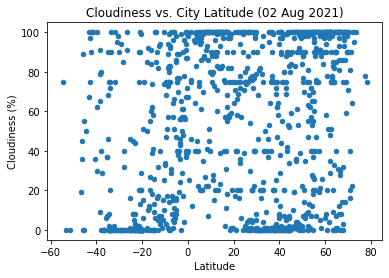

In [117]:
# Plot Cloudiness vs City Latitude
cloudiness_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                               x="lat", 
                                               y="cloudiness (%)", 
                                               title=f"Cloudiness vs. City Latitude ({date})", 
                                               xlabel="Latitude", 
                                               ylabel="Cloudiness (%)").figure
plt.show()
cloudiness_vs_lat_plot.savefig("output_data/cloudiness_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing cloudiness percentage of cities around the world and their latitude.**

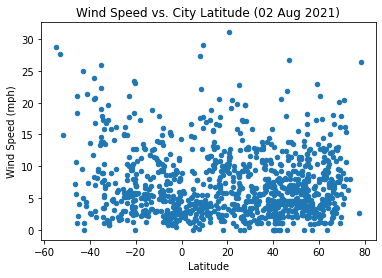

In [118]:
# Plot Wind Speed vs City Latitude
wind_speed_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                              x="lat", 
                                              y="wind_speed (mph)", 
                                              title=f"Wind Speed vs. City Latitude ({date})", 
                                              xlabel="Latitude", 
                                              ylabel="Wind Speed (mph)").figure
plt.show()
wind_speed_vs_lat_plot.savefig("output_data/wind_speed_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing wind speeds of cities around the world and their latitude.**

In [119]:
# Sort city_weather_df by "lat" ascending
city_weather_df = city_weather_df.sort_values(by="lat", ascending=True)

In [120]:
southern_hemisphere_cities = city_weather_df.loc[city_weather_df["lat"] < 0]
northern_hemisphere_cities = city_weather_df.loc[city_weather_df["lat"] >= 0]

In [121]:
#Create helper function for plotting Southern Hemisphere data
def southern_hemisphere_subplot(y_col, ylabel):
    """ Creates a subplot for Southern Hemisphere data resulting in a scatter plot and line of regression"""
    
    x_axis = southern_hemisphere_cities["lat"].tolist()
    y_axis = southern_hemisphere_cities[y_col].tolist()
    
    # Plot scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(x=x_axis, y=y_axis, color="powderblue")
    plt.title("Southern Hemisphere")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    
    # Calculate slope and y-intercept
    slope = round(st.linregress(x=x_axis, y=y_axis).slope, 3)
    y_intercept = round(st.linregress(x=x_axis, y=y_axis).intercept, 3)

    # Calculate y values for line of regression
    regression_y = []

    for i in x_axis:
        y = (slope * i) + y_intercept
        regression_y.append(y)

    # Dertermine coordinates for annotation
    x_df = pd.DataFrame({"Lats" : x_axis})
    x_median = x_df.median()

    y_df = pd.DataFrame({"Y Plots" : regression_y})
    y_median = y_df.median()
    
    offset = slope * -15

    # Plot line of regression
    plt.plot(x_axis, regression_y, color="red")
    plt.annotate(text=f"y={slope}x + {y_intercept}", xy=(x_median,y_median+offset), fontsize=14, color="red")


In [122]:
#Create helper function for plotting Northern Hemisphere data
def northern_hemisphere_subplot(y_col, ylabel):
    """ Creates a subplot for Northern Hemisphere data resulting in a scatter plot and line of regression"""
    
    x_axis = northern_hemisphere_cities["lat"].tolist()
    y_axis = northern_hemisphere_cities[y_col].tolist()

    
    # Plot scatter plot
    plt.subplot(1, 2, 2)
    plt.scatter(x=x_axis, y=y_axis, color="powderblue")
    plt.title("Northern Hemisphere")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    
    # Calculate slope and y-intercept
    slope = round(st.linregress(x=x_axis, y=y_axis).slope, 3)
    y_intercept = round(st.linregress(x=x_axis, y=y_axis).intercept, 3)

    # Calculate y values for line of regression
    regression_y = []

    for i in x_axis:
        y = (slope * i) + y_intercept
        regression_y.append(y)

    # Dertermine coordinates for annotation
    x_df = pd.DataFrame({"Lats" : x_axis})
    x_median = x_df.median()

    y_df = pd.DataFrame({"Y Plots" : regression_y})
    y_median = y_df.median()
    
    offset = slope * -15

    # Plot line of regression
    plt.plot(x_axis, regression_y, color="red")
    plt.annotate(text=f"y={slope}x + {y_intercept}", xy=(x_median,y_median+offset), fontsize=14, color="red")


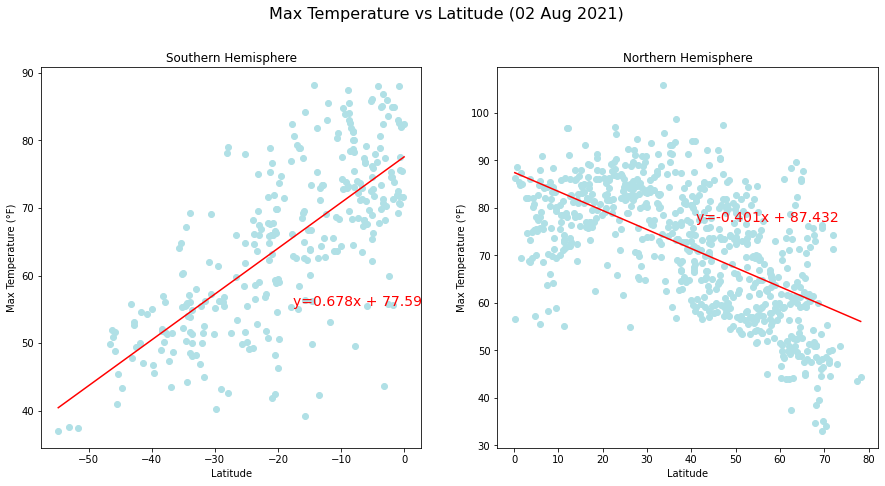

In [123]:
# Create a two-part figure that shows max temperature for the Southern and Northern Hemispheres 
south_north_temps_full_fig = plt.figure(figsize=(15,7))
south_north_temps_full_fig.suptitle(t=f"Max Temperature vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="max_temp (F)", ylabel="Max Temperature (°F)")
northern_hemisphere_subplot(y_col="max_temp (F)", ylabel="Max Temperature (°F)")
plt.show()

# Save figure to .png file
south_north_temps_full_fig.savefig("output_data/south_north_temps_full_fig.png")

**The linear regressions of the above plots show a positive correlation between max temperature and latitude in the Southern Hemisphere and a negative correlation in the Northern Hemisphere. Conclusion: The closer a city is to the Equator, the more likely it will have a higher max temperature than cities further away from the Equator.**

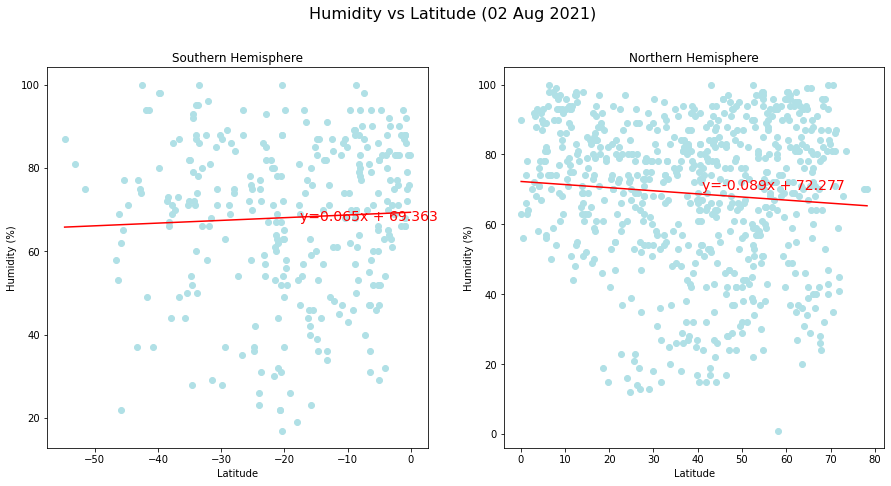

In [124]:
# Create a two-part figure that shows humidity for the Southern and Northern Hemispheres 
south_north_humidity_full_fig = plt.figure(figsize=(15,7))
south_north_humidity_full_fig.suptitle(t=f"Humidity vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="humidity (%)", ylabel="Humidity (%)")
northern_hemisphere_subplot(y_col="humidity (%)", ylabel="Humidity (%)")
plt.show()

# Save figure to .png file
south_north_humidity_full_fig.savefig("output_data/south_north_humidity_full_fig.png")

**The linear regression of the above plots show a very slight positive correleation between humidity and city latitde in the Southern Hemisphere and a slightly steeper negative correlelation between humidity and city latitude. Conclusion: In the Southern Hemisphere, humidity is marginally affected by latitude; however in the Northern Hemisphere, cities closer to the Equator likely will have a slightly higher humidity percentage than cities further from the Equator.**

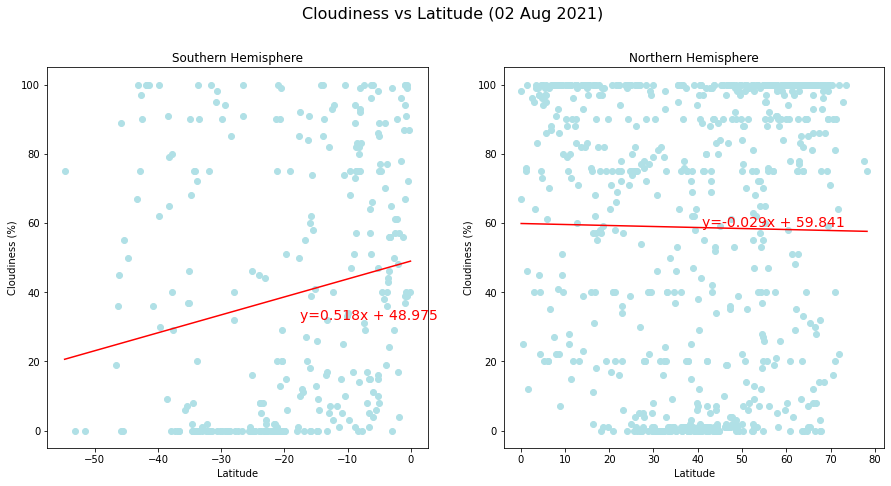

In [125]:
# Create a two-part figure that shows cloudiness for the Southern and Northern Hemispheres 
south_north_cloudiness_full_fig = plt.figure(figsize=(15,7))
south_north_cloudiness_full_fig.suptitle(t=f"Cloudiness vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="cloudiness (%)", ylabel="Cloudiness (%)")
northern_hemisphere_subplot(y_col="cloudiness (%)", ylabel="Cloudiness (%)")
plt.show()

# Save figure to .png file
south_north_cloudiness_full_fig.savefig("output_data/south_north_cloudiness_full_fig.png")

**The linear regressions of the above plots show a positive correlation between cloudiness and latitude in the Southern Hemisphere and a slight negative correlation in the Northern Hemisphere. Conclusion: In the Southern Hemispher, the closer a city is to the Equator, the more likely it will be cloudier than cities further away from the Equator; however in the Northern Hemisphere there will be little difference in cloudiness regardless of proximity to the Equator.**

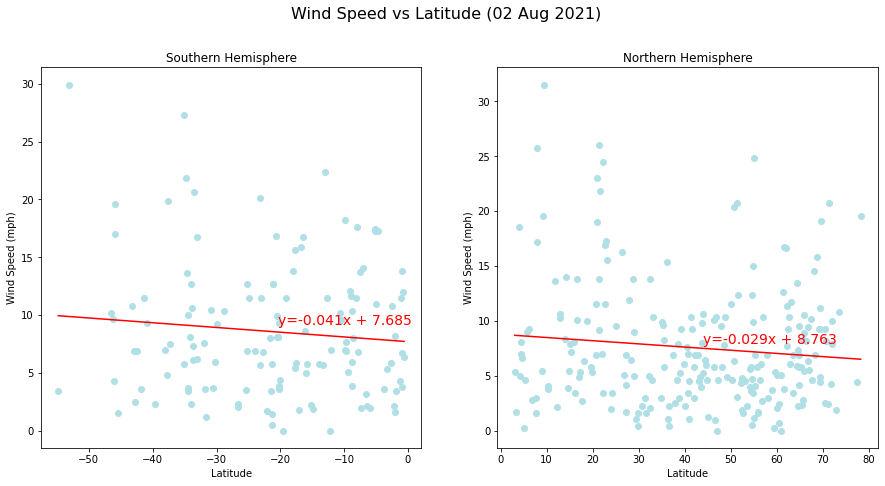

In [78]:
# Create a two-part figure that shows wind speed for the Southern and Northern Hemispheres 
south_north_wind_speed_full_fig = plt.figure(figsize=(15,7))
south_north_wind_speed_full_fig.suptitle(t=f"Wind Speed vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="wind_speed (mph)", ylabel="Wind Speed (mph)")
northern_hemisphere_subplot(y_col="wind_speed (mph)", ylabel="Wind Speed (mph)")
plt.show()

# Save figure to .png file
south_north_wind_speed_full_fig.savefig("output_data/south_north_wind_speed_full_fig.png")

**The linear regression of the above plots shows a negative correleation between wind speed and city latitde in the Southern Hemisphere and an even shallower negative correlelation between wind speed and city latitude in the Northern Hemisphere. Conclusion: In the both Hemispheres, wind speed is slightly affected by latitude, with Southern Hemisphere winds speeds decreasing slightly as city latitudes approach the equator and Northern Hemisphere winds speeds increasing slightly as city latitudes approach the Equator.**